In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#zip creates a tuple at the same index for each pair of values in 2 lists
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# how to call specific component within list of tuples
coordinates[1][0]

-53.85597669587182

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [7]:
cities[1]

'mahebourg'

In [8]:
cities[2]

'vaini'

In [9]:
cities[1:30]

['lebu',
 'rikitea',
 'basco',
 'busselton',
 'adre',
 'mys shmidta',
 'hobart',
 'cape town',
 'saleaula',
 'albany',
 'kapaa',
 'ambodifototra',
 'barrow',
 'tual',
 'muros',
 'tiksi',
 'bathsheba',
 'quatre cocos',
 'amapa',
 'punta arenas',
 'sobolevo',
 'sao filipe',
 'pevek',
 'yellowknife',
 'khatanga',
 'trat',
 'jamestown',
 'cherskiy',
 'port elizabeth']

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests as requests

In [10]:
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Loop through all the cities in our list.
#this code block would run through sets of 50 and then pause for 60 seconds, allowing
# the API to wait the requisite 60 seconds and avoiding entering the next pay level
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | basco
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | adre
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | saleaula
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | tual
Processing Record 16 of Set 1 | muros
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | quatre cocos
Processing Record 20 of Set 1 | amapa
Processing Record 21 of Set 1 | punta arenas
Processing Record 2

Processing Record 37 of Set 4 | carroll
Processing Record 38 of Set 4 | port augusta
Processing Record 39 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 40 of Set 4 | meulaboh
Processing Record 41 of Set 4 | tezu
Processing Record 42 of Set 4 | waipawa
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | makinsk
Processing Record 45 of Set 4 | dauriya
Processing Record 46 of Set 4 | flinders
Processing Record 47 of Set 4 | irbeyskoye
Processing Record 48 of Set 4 | maniitsoq
Processing Record 49 of Set 4 | idil
Processing Record 50 of Set 4 | ferrol
Processing Record 1 of Set 5 | baruun-urt
Processing Record 2 of Set 5 | tecozautla
Processing Record 3 of Set 5 | esperance
Processing Record 4 of Set 5 | narsaq
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | calama
Processing Record 8 of Set 5 | khani
Processing Record 9 of Set 5 | tikapur
Processing Record 10 of Set 5 | algiers
Proc

Processing Record 27 of Set 8 | thunder bay
Processing Record 28 of Set 8 | san alberto
Processing Record 29 of Set 8 | gorontalo
Processing Record 30 of Set 8 | kenitra
Processing Record 31 of Set 8 | diffa
Processing Record 32 of Set 8 | kongolo
Processing Record 33 of Set 8 | mayo
Processing Record 34 of Set 8 | papar
Processing Record 35 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 36 of Set 8 | nishihara
Processing Record 37 of Set 8 | chirnogi
Processing Record 38 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 39 of Set 8 | tripoli
Processing Record 40 of Set 8 | corvallis
Processing Record 41 of Set 8 | siilinjarvi
Processing Record 42 of Set 8 | te anau
Processing Record 43 of Set 8 | gotsu
Processing Record 44 of Set 8 | cordoba
Processing Record 45 of Set 8 | aklavik
Processing Record 46 of Set 8 | warmbad
Processing Record 47 of Set 8 | envira
Processing Record 48 of Set 8 | la ronge
Processing Record 49 of Set 8 | san quintin
Proce

Processing Record 15 of Set 12 | ilinskiy
Processing Record 16 of Set 12 | bandarbeyla
Processing Record 17 of Set 12 | carupano
Processing Record 18 of Set 12 | bennington
Processing Record 19 of Set 12 | ciudad bolivar
Processing Record 20 of Set 12 | borovoy
Processing Record 21 of Set 12 | takoradi
Processing Record 22 of Set 12 | nuuk
Processing Record 23 of Set 12 | marawi
Processing Record 24 of Set 12 | hovd
Processing Record 25 of Set 12 | paradwip
City not found. Skipping...
Processing Record 26 of Set 12 | mercedes
Processing Record 27 of Set 12 | ulundi
Processing Record 28 of Set 12 | kifri
Processing Record 29 of Set 12 | galesong
Processing Record 30 of Set 12 | la oroya
Processing Record 31 of Set 12 | constitucion
Processing Record 32 of Set 12 | walvis bay
Processing Record 33 of Set 12 | artyk
City not found. Skipping...
Processing Record 34 of Set 12 | zhoucheng
Processing Record 35 of Set 12 | oistins
Processing Record 36 of Set 12 | kendari
Processing Record 37 of

In [14]:
print(len(city_data))

562


In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,62.73,78,79,11.68,ZA,2022-03-29 05:29:32
1,Lebu,-37.6167,-73.6500,55.53,87,66,12.73,CL,2022-03-29 05:29:33
2,Rikitea,-23.1203,-134.9692,78.26,68,86,3.18,PF,2022-03-29 05:29:33
3,Basco,20.4487,121.9702,79.29,79,100,21.16,PH,2022-03-29 05:29:34
4,Busselton,-33.6500,115.3333,78.31,55,98,15.14,AU,2022-03-29 05:29:34
5,Adre,13.4667,22.2000,66.25,7,37,18.95,TD,2022-03-29 05:29:34
6,Hobart,-42.8794,147.3294,72.27,67,20,12.66,AU,2022-03-29 05:29:35
7,Cape Town,-33.9258,18.4232,64.81,76,75,14.97,ZA,2022-03-29 05:29:35
8,Albany,42.6001,-73.9662,17.76,59,85,3.00,US,2022-03-29 05:25:34
9,Kapaa,22.0752,-159.3190,73.72,82,40,11.50,US,2022-03-29 05:29:12


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [23]:
city_data_df = city_data_df[new_column_order]

In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

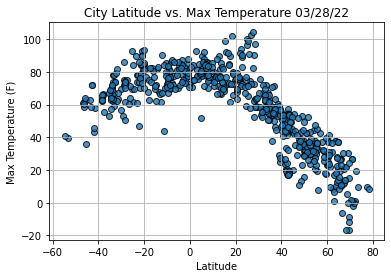

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# %x gives the data in mo/da/year format
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

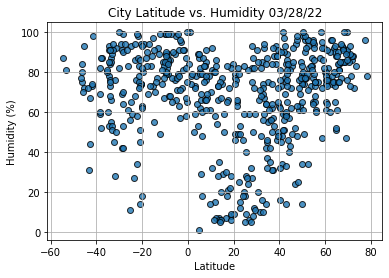

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

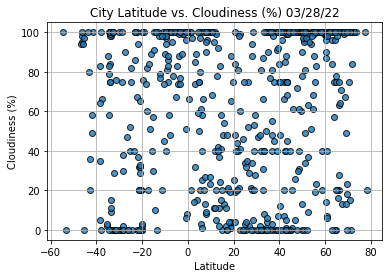

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

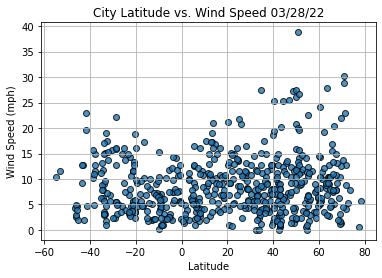

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                        Tiksi
Country                        RU
Date          2022-03-29 05:29:38
Lat                       71.6872
Lng                      128.8694
Max Temp                     0.52
Humidity                       86
Cloudiness                     84
Wind Speed                   4.09
Name: 13, dtype: object

In [34]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
557     True
558     True
559    False
560    False
561     True
Name: Lat, Length: 562, dtype: bool

In [35]:
city_data_df.loc[(city_data_df['Lat'] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Basco,PH,2022-03-29 05:29:34,20.4487,121.9702,79.29,79,100,21.16
5,Adre,TD,2022-03-29 05:29:34,13.4667,22.2000,66.25,7,37,18.95
8,Albany,US,2022-03-29 05:25:34,42.6001,-73.9662,17.76,59,85,3.00
9,Kapaa,US,2022-03-29 05:29:12,22.0752,-159.3190,73.72,82,40,11.50
10,Barrow,US,2022-03-29 05:25:02,71.2906,-156.7887,-2.18,78,0,23.02


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

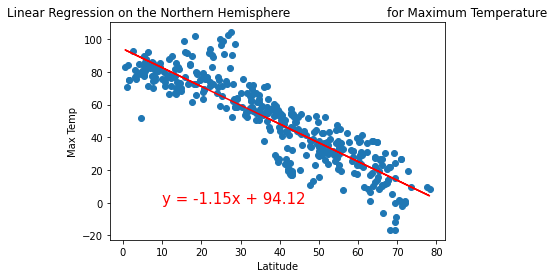

In [38]:
# Linear regression on the Northern Hemisphere
# text is called relative to the graph
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

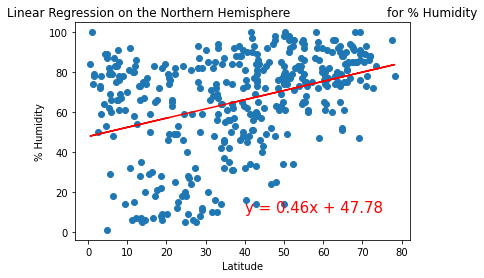

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

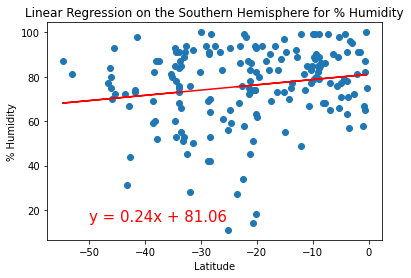

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

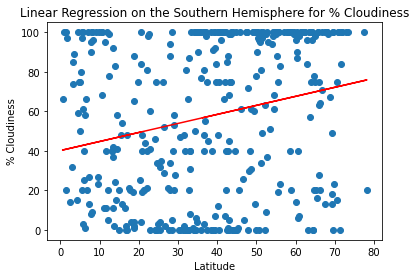

In [44]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

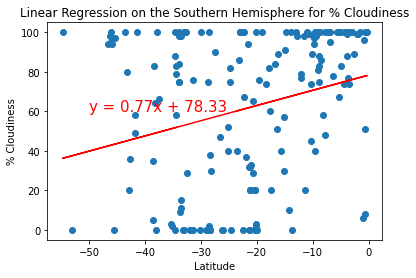

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

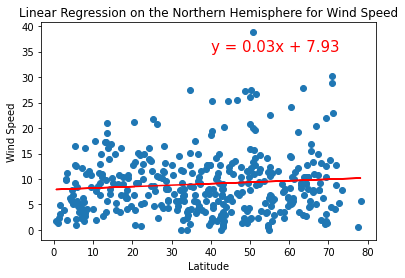

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

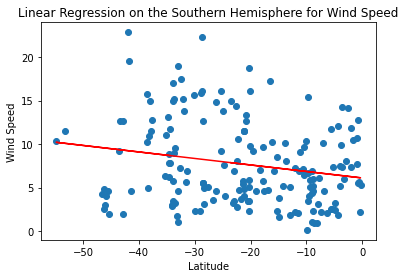

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))